In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm


start = "2017-1-1"
symbols_list = ['AMZN', 'AAL']

In [16]:
import matplotlib as mpl

In [15]:
matplotlib.__version__

'3.3.4'

In [3]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)
  
# get the data
data = yf.download('AMZN', start = start_date,
                   end = end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data = data.reset_index()
data = data[['Date', 'Close']]

<AxesSubplot:>

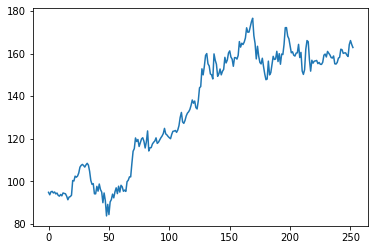

In [5]:
data['Close'].plot()

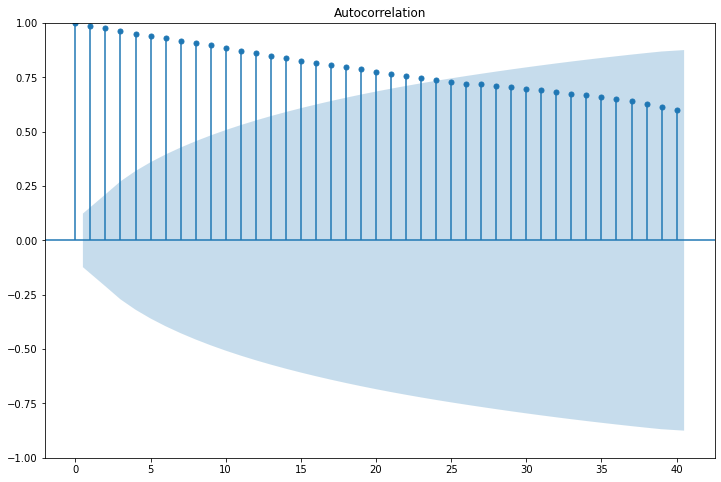

In [17]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(12, 8))
    sm.graphics.tsa.plot_acf(data['Close'], lags = 40)

## Time Series Analysis 

It definitely appears to have a trend in the time series. Before we explore the autocorellation in the time series data we have to make sure that we detrend the time series. This means that we need to make sure that our time series is stationary before we explore the auto-correlation.


In general time series are composed by three different components:

1) Trend: is the overall change over time, e.g. steady growth or decline in values. An example for the trend is the constantly growing energy consumptions in most countries.

2) The Seasonality: is the results of seasonal effects i.e., regularly recurring effects that lead to an increase or decrease with respect to the general trend.

3) The autocorrelation between observations R_t. The Autocorrelation models how the value at time t depends on the prior values, i.e., how x_t is correlated with x_{t-1}, x_{t-2}. The autocorrelation models the changes in time series that are not explained by the trens or seasonality.

So, before we start exploring autocorrelation we need to make sure that our time series are stationary.

ADF test is used to determine the presence of unit root in the series. and thus help us understand if the ts is stationary or not. 

- Null hypothesis: The series has a unit root
- Alternative Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, the test may provide evidence that the series is not stationary.




In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts):
    print('Results of Dickey - Fuller test:')
    dftest = adfuller(ts, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = [
                             'Test Statistic',
                             'p-value',
                             '# of Lags',
                             '# of Obs used'])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
        
    print(dfoutput)

ts = data['Close']
adf_test(ts)

Results of Dickey - Fuller test:
Test Statistic           -1.073068
p-value                   0.725692
# of Lags                 3.000000
# of Obs used           249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


Base on the p-value, we cannot reject the null hypothesis. So, our series is not stationary. Let's now try to convert the ts to stationary by applying differencing.


<AxesSubplot:>

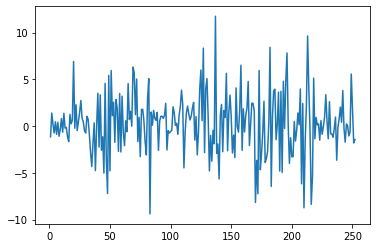

In [22]:
data['CloseDiff'] = data['Close'] - data['Close'].shift(1)
data['CloseDiff'].dropna().plot()

In [23]:
adf_test(data['CloseDiff'].dropna())

Results of Dickey - Fuller test:
Test Statistic         -1.051364e+01
p-value                 1.009437e-18
# of Lags               2.000000e+00
# of Obs used           2.490000e+02
Critical Value (1%)    -3.456888e+00
Critical Value (5%)    -2.873219e+00
Critical Value (10%)   -2.572994e+00
dtype: float64
